In [3]:
# Q2 part 4
import numpy as np
import scipy.stats as stats

lambda_0 = 5    
n = 20       
alpha = 0.05    
num_simulations = 10000  


def perform_test():
    X = np.random.poisson(lambda_0, n)
    lambda_hat = np.mean(X)

    se_lambda_hat = np.sqrt(lambda_0 / n)
    
    test_statistic = (lambda_hat - lambda_0) / se_lambda_hat
    critical_value = 1.96
    reject_null = np.abs(test_statistic) > critical_value
    return reject_null

rejections = 0
for _ in range(num_simulations):
    if perform_test():
        rejections += 1

type_I_error_rate = rejections / num_simulations

print(f"estimated type I error rate: {type_I_error_rate:.3f}")


estimated type I error rate: 0.052


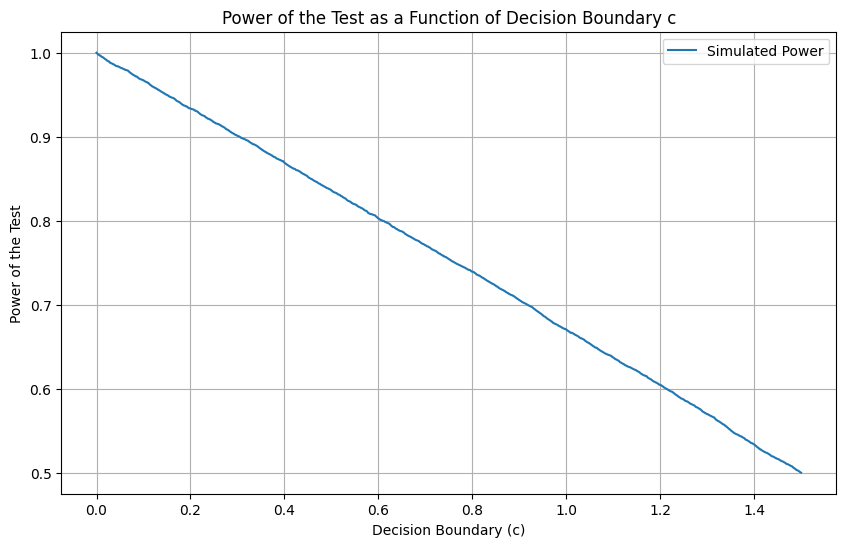

In [1]:
#Q3 part 2
import numpy as np
import matplotlib.pyplot as plt


def f0(x):
    return 1.5 if 0 <= x <= 2 else 0

def f1(x):
    return 3 * x if 0 <= x <= 3 else 0

c_values = np.linspace(0, 1.5, 1000)

num_simulations = 10000

X0 = np.random.uniform(0, 2, num_simulations)
X1 = np.random.uniform(0, 3, num_simulations)  

alpha_values = []  
beta_values = []  

for c in c_values:
    alpha = np.mean(X0 > c)
    
    beta = np.mean(X1 <= c)
    
    alpha_values.append(alpha)
    beta_values.append(beta)

power_values = 1 - np.array(beta_values)

plt.figure(figsize=(10, 6))
plt.plot(c_values, power_values, label="Simulated Power")
plt.xlabel('Decision Boundary (c)')
plt.ylabel('Power of the Test')
plt.title('Power of the Test as a Function of Decision Boundary c')
plt.grid(True)
plt.legend()
plt.show()


In [7]:
# Q10 part a
import numpy as np
import scipy.stats as stats

population_mean = 2  
population_std = 0.5  
sample_size = 12  
confidence_level = 0.95  

SE = population_std / np.sqrt(sample_size)

z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)

sample_mean = population_mean

CI_lower = sample_mean - z_value * SE
CI_upper = sample_mean + z_value * SE

print(f"95% CI for the sample mean: ({CI_lower:.3f}, {CI_upper:.3f})")

95% CI for the sample mean: (1.717, 2.283)


In [8]:
# Q10 part b
num_samples = 100  


SE = population_std / np.sqrt(sample_size)

z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)

ci_lower = []
ci_upper = []

for _ in range(num_samples):
    sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)
    
    sample_mean = np.mean(sample)
    
    lower_bound = sample_mean - z_value * SE
    upper_bound = sample_mean + z_value * SE
    
    ci_lower.append(lower_bound)
    ci_upper.append(upper_bound)

ci_lower = np.array(ci_lower)
ci_upper = np.array(ci_upper)

for i in range(5):
    print(f"sample number {i+1}: CI = ({ci_lower[i]:.3f}, {ci_upper[i]:.3f})")

sample number 1: CI = (1.768, 2.334)
sample number 2: CI = (1.712, 2.278)
sample number 3: CI = (1.684, 2.249)
sample number 4: CI = (1.912, 2.478)
sample number 5: CI = (1.721, 2.287)


In [15]:
#Q10 part c
coverage_count = 0

for _ in range(num_samples):
    sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)
    
    sample_mean = np.mean(sample)
    
    lower_bound = sample_mean - z_value * SE
    upper_bound = sample_mean + z_value * SE
    
    if lower_bound <= population_mean <= upper_bound:
        coverage_count += 1

coverage_percentage = (coverage_count / num_samples) * 100

print(f"Percentage of times the CI contains the true population mean: {coverage_percentage:.2f}%")

percentage of times the CI contains the true population mean: 92.00%


In [13]:

ci_known_std = []
ci_unknown_std_z = []
ci_unknown_std_t = []

for _ in range(num_samples):
    sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)
    
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1) 
    
    ci_known = (sample_mean - z_value * SE, sample_mean + z_value * SE  )
    ci_known_std.append(ci_known)
    
    ci_unknown_z = (sample_mean - z_value * (sample_std / np.sqrt(sample_size)),
                    sample_mean + z_value * (sample_std / np.sqrt(sample_size)))
    ci_unknown_std_z.append(ci_unknown_z)
    
    t_value = stats.t.ppf(1 - (1 - confidence_level) / 2, df=sample_size - 1)
    ci_unknown_t = (sample_mean - t_value * (sample_std / np.sqrt(sample_size)),
                    sample_mean + t_value * (sample_std / np.sqrt(sample_size)))
    ci_unknown_std_t.append(ci_unknown_t)

ci_known_std = np.array(ci_known_std)
ci_unknown_std_z = np.array(ci_unknown_std_z)
ci_unknown_std_t = np.array(ci_unknown_std_t)

def coverage_percentage(ci_list):
    count = 0
    for ci in ci_list:
        if ci[0] <= population_mean <= ci[1]:
            count += 1
    return (count / len(ci_list)) * 100

coverage_known_std = coverage_percentage(ci_known_std)
coverage_unknown_std_z = coverage_percentage(ci_unknown_std_z)
coverage_unknown_std_t = coverage_percentage(ci_unknown_std_t)

# Display results
print(f"Coverage for CI with known population std (σ) and Z-distribution: {coverage_known_std:.2f}%")
print(f"Coverage for CI with unknown population std (σ) and Z-distribution (incorrect): {coverage_unknown_std_z:.2f}%")
print(f"Coverage for CI with unknown population std (σ) and T-distribution (correct): {coverage_unknown_std_t:.2f}%")

coverage for CI with known population std (σ) and Z-distribution: 99.00%
coverage for CI with unknown population std (σ) and Z-distribution (incorrect): 99.00%
coverage for CI with unknown population std (σ) and T-distribution (correct): 99.00%
